<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/Segment_Ajuste_mar_2021/Fig_05_BIG_Segmentation_mar_31_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
from sklearn.externals import joblib

In [18]:
!pip install mahotas

In [19]:
import mahotas.features.texture as mht
import mahotas.features

In [20]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_fev_2020


In [21]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_fev_2020/Doutorado


In [22]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [23]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [24]:
from segment_not_conclude import Segmenta  # got image provided segmented

In [25]:
df=Segmenta(img)


In [26]:
print(df)

    Width           0           1  ...         781         782         783
0     172   87.137375   84.548950  ...   55.378044   55.151974   54.775021
1     170  120.708374   95.566513  ...   28.960415   15.384084   10.845952
2     154   57.487606   53.669426  ...    5.016529    1.016529    0.074380
3     196   99.040817  106.530609  ...  110.734688  107.632652  105.714287
4     152   93.245850   97.137802  ...    6.608726    6.807479    6.928670
5     131  100.436745  108.097252  ...    7.625954    7.807062    8.541285
6     191   34.278172   30.919714  ...  118.762924  119.547592  118.266113
7     121  102.880615  110.120689  ...   82.246231   49.594704   42.859097
8     109   64.809525   62.845047  ...  116.393234  121.029953  121.292900
9     119  113.159180  119.858139  ...  156.179947  163.979248  171.024231
10    182  108.597649   90.727821  ...    2.082840    1.142012    1.000000
11    117  102.955452   80.374237  ...    8.216305    8.866755    8.449485
12    190   76.241219   7

In [27]:
del df['Width']
print(df)

           0           1           2    ...         781         782         783
0    87.137375   84.548950   79.955116  ...   55.378044   55.151974   54.775021
1   120.708374   95.566513   53.979515  ...   28.960415   15.384084   10.845952
2    57.487606   53.669426   46.413227  ...    5.016529    1.016529    0.074380
3    99.040817  106.530609  124.489792  ...  110.734688  107.632652  105.714287
4    93.245850   97.137802   98.520775  ...    6.608726    6.807479    6.928670
5   100.436745  108.097252  115.084381  ...    7.625954    7.807062    8.541285
6    34.278172   30.919714   59.730907  ...  118.762924  119.547592  118.266113
7   102.880615  110.120689  113.622772  ...   82.246231   49.594704   42.859097
8    64.809525   62.845047   58.837723  ...  116.393234  121.029953  121.292900
9   113.159180  119.858139  104.584770  ...  156.179947  163.979248  171.024231
10  108.597649   90.727821   70.970413  ...    2.082840    1.142012    1.000000
11  102.955452   80.374237   71.078163  

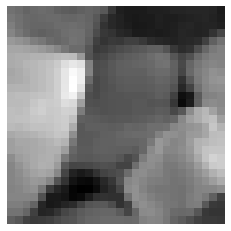

In [28]:
Size=28
#qual_img=7
#L = Width[qual_img]
data=np.array(df.iloc[0,:]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)

img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.axis('off')
plt.imshow(Foto, cmap = "gray")

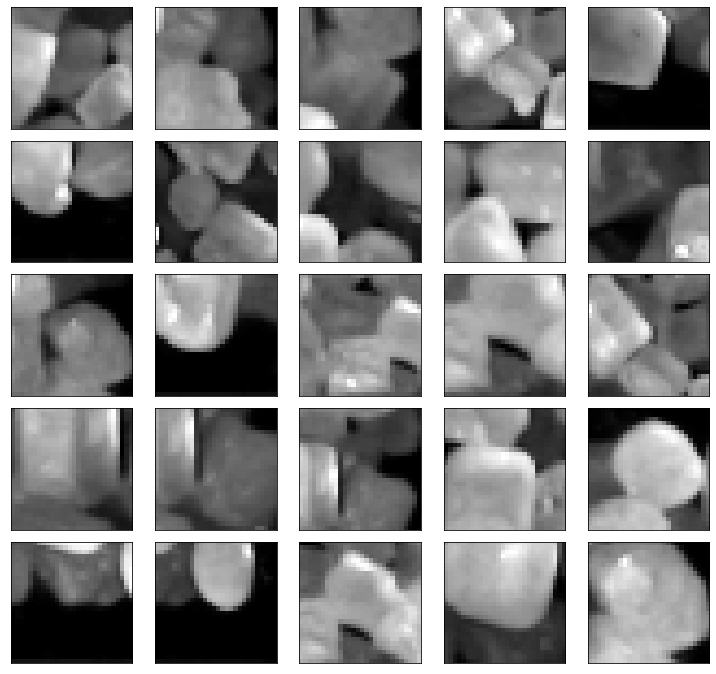

In [29]:
Num = 25
Size=28
Picture_Size = 25
fig = plt.gcf()
fig.set_size_inches(Picture_Size, Picture_Size)
for i in range(Num):
  data=np.array(df.iloc[i,:]).reshape(Size,Size)
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)

  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  Foto=np.array(img28).reshape(28,28)
  plt.subplot(25,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Foto, cmap = "gray")
  #plt.xlabel(i)

plt.subplots_adjust(bottom=0.15,left=0.4, right=0.8, top=2,hspace=0.1, wspace=0.01)
#plt.subplots_adjust(bottom=0.2, right=2, top=3,hspace=0.4, wspace=0.4)


In [30]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
filename = 'model_ANN.pkl'
model = joblib.load(filename)

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [31]:
result = np.array(df)/255
prediction = model.predict(result)
print(prediction)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1]


In [32]:
result

array([[3.41715196e-01, 3.31564511e-01, 3.13549476e-01, ...,
        2.17168801e-01, 2.16282250e-01, 2.14804002e-01],
       [4.73366173e-01, 3.74770639e-01, 2.11684373e-01, ...,
        1.13570254e-01, 6.03297402e-02, 4.25331452e-02],
       [2.25441592e-01, 2.10468337e-01, 1.82012655e-01, ...,
        1.96726631e-02, 3.98638856e-03, 2.91686958e-04],
       ...,
       [2.33489841e-01, 2.81768709e-01, 2.97691345e-01, ...,
        2.60231822e-02, 2.66004375e-02, 2.65167760e-02],
       [2.89064564e-01, 2.92154888e-01, 3.10573443e-01, ...,
        1.34322297e-01, 1.43091404e-01, 1.82043771e-01],
       [3.65813910e-01, 3.52465940e-01, 3.37583475e-01, ...,
        2.70001617e-02, 2.65249028e-02, 2.64108415e-02]])